In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#import data and drop index
test = pd.read_csv('AssignmentProblem10by10.csv')
del test['Unnamed: 0']
test.head(10)

,A,B,C,D,E,F,G,H,I,J
0,53,82,50,97,44,58,54,19,88,59
1,30,16,45,27,56,28,23,11,10,89
2,30,16,45,27,56,28,23,11,10,89
3,64,35,39,48,43,94,48,96,40,94
4,36,74,11,88,3,75,85,84,23,22
5,35,71,59,71,63,79,87,10,58,89
6,87,71,59,86,7,86,15,95,48,18
7,42,4,62,84,40,48,84,84,75,60
8,24,95,68,41,46,68,97,33,43,97
9,49,69,41,69,33,45,87,36,93,96


In [3]:
#transfer data from to array
testarray = test.T.values
np.array(testarray)

array([[53, 30, 30, 64, 36, 35, 87, 42, 24, 49],
       [82, 16, 16, 35, 74, 71, 71,  4, 95, 69],
       [50, 45, 45, 39, 11, 59, 59, 62, 68, 41],
       [97, 27, 27, 48, 88, 71, 86, 84, 41, 69],
       [44, 56, 56, 43,  3, 63,  7, 40, 46, 33],
       [58, 28, 28, 94, 75, 79, 86, 48, 68, 45],
       [54, 23, 23, 48, 85, 87, 15, 84, 97, 87],
       [19, 11, 11, 96, 84, 10, 95, 84, 33, 36],
       [88, 10, 10, 40, 23, 58, 48, 75, 43, 93],
       [59, 89, 89, 94, 22, 89, 18, 60, 97, 96]])

In [4]:
testarray[0,3]

64

### According to the Central Limit Theorom , we repeat the test to get the lowest cost.
### Since we use Greedy Algorithm to approach the answer, we need to randomly pick up an employee, utilizing different employee combination for each test.

After 100 test, the lowest cost is: 234 ; the highest cost is: 350 ; the average cost is: 269.32


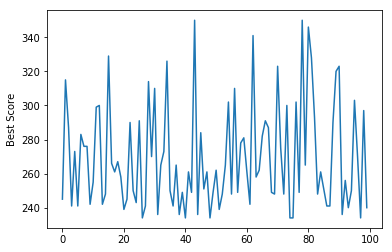

In [181]:
def extract(ID): # extract raw data from array and return task for single employee
        single = []
        single = testarray[ID,0:10]
        return single
    

total_score = []
score = []

for test in range(0,100): #we do 100 times to get best cost
    task = [0,1,2,3,4,5,6,7,8,9] #all available index list
    solution = []

    randomlist = random.sample(range(10), 10) #we random pick up an employee(wiht ID)
    for ID in randomlist: 
        single = extract(ID).tolist()
        candidate = []
        for j in task: #pick available options
            candidate.append(single[j]) 
        best = min(candidate) #get the min cost from available options
        single = candidate
        task.pop(single.index(best)) #since we only can't reuse an index, del it from available index list
        solution.append(best) #build the best cost list of current test
    score.append(sum(solution))#append the sum of current best solution


plt.plot(score)
plt.ylabel('Best Score')
print('After', len(score),'test, the lowest cost is:', min(score),'; the highest cost is:', max(score),
      '; the average cost is:', abs(sum(score)/len(score)))